In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# import pandas as pd

# df =pd.read_csv("drive/My Drive/Elpida/compressed_dataset.csv")
# df.head()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
# df.to_csv(r'datawithdate.csv')

In [4]:
#df = pd.read_csv("datawithdate.csv")

In [5]:
df = pd.read_csv("compressed_dataset.csv")

In [6]:
# first column gets dropped
df = df.drop(columns=['Unnamed: 0'])

In [7]:
df

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms
0,1632762065906,5.0,107.0,11661.0,2.0,3.0,WFO,0.999976,0.0,785
1,1632762104254,5.0,107.0,12810.0,2.0,3.0,WFH,0.281964,0.9,3895
2,1632762108299,5.0,107.0,15129.0,19.0,3.0,WFH,1.000000,0.9,0
3,1632762112510,5.0,107.0,5860.0,217.0,3.0,WFH,0.999988,0.0,466
4,1632762129231,5.0,107.0,4483.0,2.0,3.0,WFO,1.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...
20615365,1647872264309,1.0,401.0,845.0,19.0,3.0,WFO,1.000000,0.0,0
20615366,1647872276879,1.0,401.0,11100.0,3963.0,3.0,WFO,1.000000,0.0,0
20615367,1647872288293,1.0,401.0,2155.0,6.0,1.0,WFO,1.000000,0.0,0
20615368,1647872288564,1.0,401.0,1011.0,19.0,3.0,WFO,1.000000,0.9,0


In [8]:
from datetime import datetime
dates = []
for i in range(len(df)):
    dates.append(datetime.utcfromtimestamp((df['timestamp'][i])/1000).strftime('%Y-%m-%d %H:%M:%S'))
df['date'] = dates
#orizoume tin stili date

In [9]:
df

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,date
0,1632762065906,5.0,107.0,11661.0,2.0,3.0,WFO,0.999976,0.0,785,2021-09-27 17:01:05
1,1632762104254,5.0,107.0,12810.0,2.0,3.0,WFH,0.281964,0.9,3895,2021-09-27 17:01:44
2,1632762108299,5.0,107.0,15129.0,19.0,3.0,WFH,1.000000,0.9,0,2021-09-27 17:01:48
3,1632762112510,5.0,107.0,5860.0,217.0,3.0,WFH,0.999988,0.0,466,2021-09-27 17:01:52
4,1632762129231,5.0,107.0,4483.0,2.0,3.0,WFO,1.000000,0.0,0,2021-09-27 17:02:09
...,...,...,...,...,...,...,...,...,...,...,...
20615365,1647872264309,1.0,401.0,845.0,19.0,3.0,WFO,1.000000,0.0,0,2022-03-21 14:17:44
20615366,1647872276879,1.0,401.0,11100.0,3963.0,3.0,WFO,1.000000,0.0,0,2022-03-21 14:17:56
20615367,1647872288293,1.0,401.0,2155.0,6.0,1.0,WFO,1.000000,0.0,0,2022-03-21 14:18:08
20615368,1647872288564,1.0,401.0,1011.0,19.0,3.0,WFO,1.000000,0.9,0,2022-03-21 14:18:08


In [10]:
df.groupby(['customer_id']).count()

,timestamp,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,date
customer_id,,,,,,,,,,
0.0,3262364,3262364,3262364,3262364,3262364,3262364,3262364,3262364,3262364,3262364
1.0,1953069,1953069,1953069,1953069,1953069,1953069,1953069,1953069,1953069,1953069
2.0,1346908,1346908,1346908,1346908,1346908,1346908,1346908,1346908,1346908,1346908
3.0,1121897,1121897,1121897,1121897,1121897,1121897,1121897,1121897,1121897,1121897
4.0,1029532,1029532,1029532,1029532,1029532,1029532,1029532,1029532,1029532,1029532
5.0,1065727,1065727,1065727,1065727,1065727,1065727,1065727,1065727,1065727,1065727
6.0,996832,996832,996832,996832,996832,996832,996832,996832,996832,996832
7.0,994323,994323,994323,994323,994323,994323,994323,994323,994323,994323
8.0,942515,942515,942515,942515,942515,942515,942515,942515,942515,942515


# Bullet 1

In [11]:
def month_enum(agrument):
    switcher = {
        9: 1,
        10: 2,
        11: 3,
        12: 4,
        1: 5,
        2: 6,
        3: 7
    }
    return switcher.get(argument, "nothing")

In [12]:
df['event_id'].describe()

count    2.061537e+07
mean     1.053845e+02
std      1.282433e+02
min      0.000000e+00
25%      9.000000e+00
50%      5.300000e+01
75%      1.560000e+02
max      7.330000e+02
Name: event_id, dtype: float64

In [13]:
customers = df.groupby('customer_id')

In [14]:
df

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,date
0,1632762065906,5.0,107.0,11661.0,2.0,3.0,WFO,0.999976,0.0,785,2021-09-27 17:01:05
1,1632762104254,5.0,107.0,12810.0,2.0,3.0,WFH,0.281964,0.9,3895,2021-09-27 17:01:44
2,1632762108299,5.0,107.0,15129.0,19.0,3.0,WFH,1.000000,0.9,0,2021-09-27 17:01:48
3,1632762112510,5.0,107.0,5860.0,217.0,3.0,WFH,0.999988,0.0,466,2021-09-27 17:01:52
4,1632762129231,5.0,107.0,4483.0,2.0,3.0,WFO,1.000000,0.0,0,2021-09-27 17:02:09
...,...,...,...,...,...,...,...,...,...,...,...
20615365,1647872264309,1.0,401.0,845.0,19.0,3.0,WFO,1.000000,0.0,0,2022-03-21 14:17:44
20615366,1647872276879,1.0,401.0,11100.0,3963.0,3.0,WFO,1.000000,0.0,0,2022-03-21 14:17:56
20615367,1647872288293,1.0,401.0,2155.0,6.0,1.0,WFO,1.000000,0.0,0,2022-03-21 14:18:08
20615368,1647872288564,1.0,401.0,1011.0,19.0,3.0,WFO,1.000000,0.9,0,2022-03-21 14:18:08


In [15]:
x = df.groupby('customer_id').count()

In [16]:
list_x = x['timestamp'].tolist()
list_x

[3262364,
 1953069,
 1346908,
 1121897,
 1029532,
 1065727,
 996832,
 994323,
 942515,
 790349,
 189892,
 764832,
 713975,
 507781,
 633480,
 610858,
 655702,
 530703,
 581031,
 396081,
 346497,
 309519,
 291864,
 132987,
 85121,
 79660,
 62920,
 58847,
 44027,
 37968,
 31742,
 24632,
 21735]

In [17]:
total = sum(list_x)
total

20615370

In [18]:
percent = [(i/total)*100 for i in sorted(list_x, reverse=True)]
cum_percent = np.cumsum(percent)

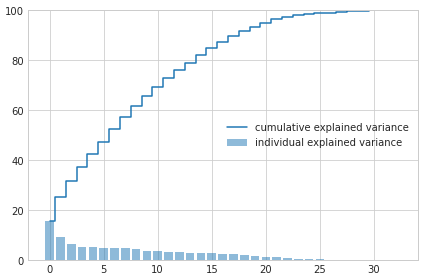

In [19]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(33), percent, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(33), cum_percent, where='mid',
             label='cumulative explained variance')
    plt.ylabel('')
    plt.xlabel('')
    plt.ylim(0,100)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.savefig("figures/explained variance2.jpg")

The firts 20 customers represent the 95% of the data. So we choose to visualize them. 

In [20]:
empty = np.zeros(len(df['customer_id']))
df['QoE'] = empty

In [21]:
df

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,date,QoE
0,1632762065906,5.0,107.0,11661.0,2.0,3.0,WFO,0.999976,0.0,785,2021-09-27 17:01:05,0.0
1,1632762104254,5.0,107.0,12810.0,2.0,3.0,WFH,0.281964,0.9,3895,2021-09-27 17:01:44,0.0
2,1632762108299,5.0,107.0,15129.0,19.0,3.0,WFH,1.000000,0.9,0,2021-09-27 17:01:48,0.0
3,1632762112510,5.0,107.0,5860.0,217.0,3.0,WFH,0.999988,0.0,466,2021-09-27 17:01:52,0.0
4,1632762129231,5.0,107.0,4483.0,2.0,3.0,WFO,1.000000,0.0,0,2021-09-27 17:02:09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20615365,1647872264309,1.0,401.0,845.0,19.0,3.0,WFO,1.000000,0.0,0,2022-03-21 14:17:44,0.0
20615366,1647872276879,1.0,401.0,11100.0,3963.0,3.0,WFO,1.000000,0.0,0,2022-03-21 14:17:56,0.0
20615367,1647872288293,1.0,401.0,2155.0,6.0,1.0,WFO,1.000000,0.0,0,2022-03-21 14:18:08,0.0
20615368,1647872288564,1.0,401.0,1011.0,19.0,3.0,WFO,1.000000,0.9,0,2022-03-21 14:18:08,0.0


customer  0
[0.9890344001755703, 0.9934412034043767, 0.9937444660284941, 0.9475946493436492]
Number 0


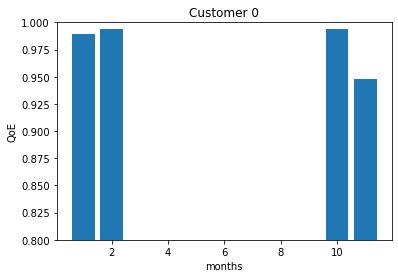

customer  1
[0.9827257681022866, 0.9864523767445808, 0.9781987718550448, 0.9990005077086384, 0.9871555497760959, 0.9849627394108601]
Number 1


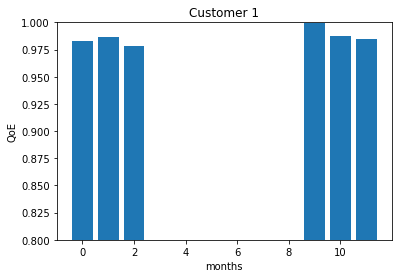

customer  2
[0.9943080922928079, 0.9774696617588475, 0.974537249290358, 0.9796078184026277, 0.9901315496966928, 0.9912416791319151]
Number 2


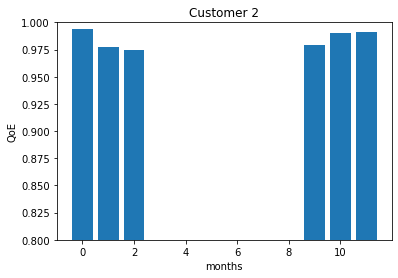

customer  3
[0.9979894291126454, 0.9937149066164044, 0.9945930775861822, 0.995958883090152, 0.9982941699649278, 0.9975177871635539]
Number 3


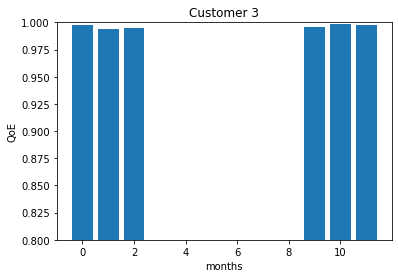

customer  4
[0.9836842610209564, 0.9687773851205753, 0.9816157942006756, 0.968348878545527, 0.912057402210821, 0.9825098844897898]
Number 4


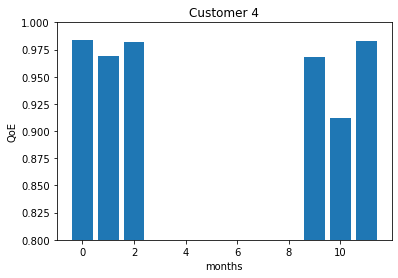

customer  5
[0.9931621345948329, 0.9872091299155352, 0.9897281453331005, 0.9918121603735894]
Number 5


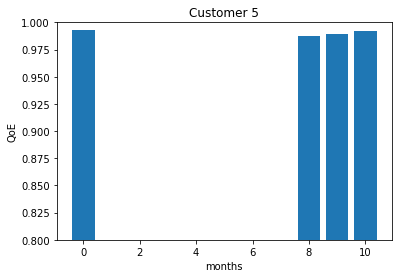

customer  6
[0.9793377892075925, 0.9608133807179777, 0.9377049277886371, 0.9817338940267673]
Number 6


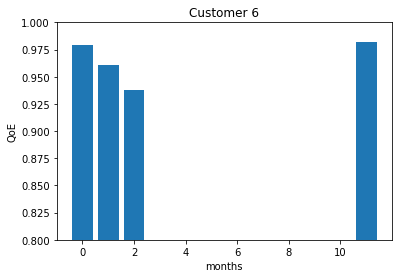

customer  7
[0.9804256662574167, 0.9819710505544469, 0.8481510212431771, 0.9987723069912471, 0.9729614570602352, 0.9688284454614258, 0.9688494933782943]
Number 7


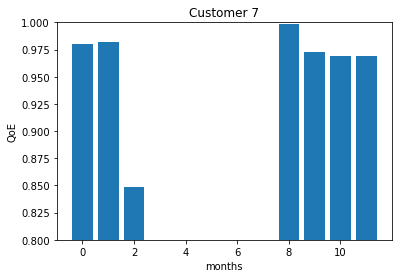

customer  8
[0.9911870608675023, 0.9841061882598637, 0.9957990439707785, 0.9631293195250494, 0.9889822259640005, 0.9808715428087961, 0.9898350154769809]
Number 8


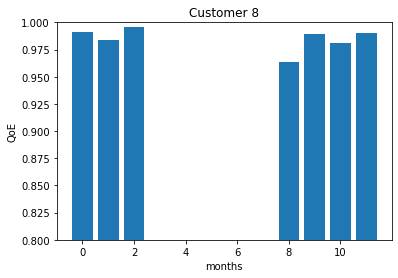

customer  9
[0.9954399746914142, 0.9836972670356872, 0.9932590833783618, 0.9908481138561349, 0.9900685254677958, 0.9927551488075728]
Number 9


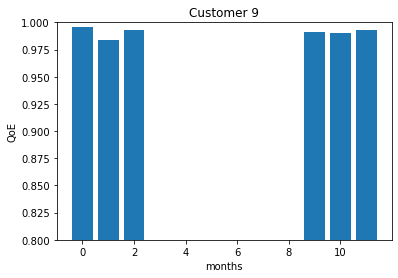

customer  10
[0.9432612467910694, 0.9885994674244939, 0.9907206665257593, 0.9696637492835494]
Number 10


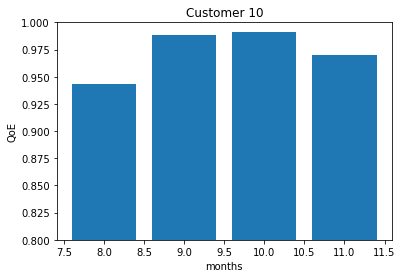

customer  11
[0.9961162105775071, 0.9874727179939473, 0.9572921913589045, 0.9846194340609024]
Number 11


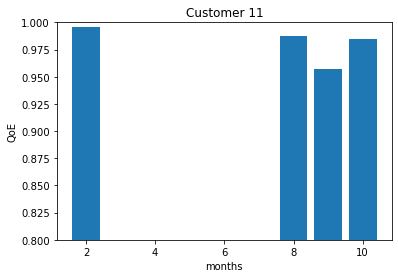

customer  12
[0.9921004130188491, 0.9965777448436048, 0.988327057534435, 0.9858060748341071, 0.9944369741350575, 0.9954885490391918]
Number 12


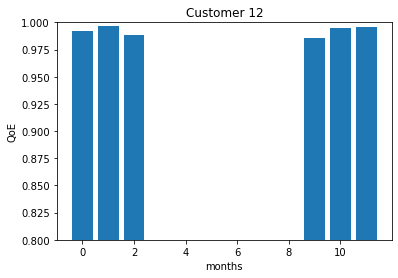

customer  13
[0.9876431139037795, 0.992149380440869, 0.981018055387632, 0.9936159372945922]
Number 13


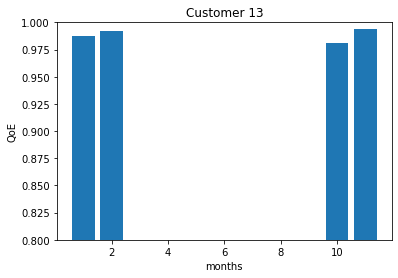

customer  14
[0.9143101141716722, 0.9454272258015793, 0.926479323957035, 0.9563901922483716, 0.9651113971146067, 0.9755957704246282, 0.9741953533389881]
Number 14


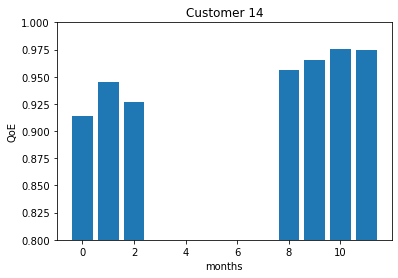

customer  15
[0.9959672688069082, 0.9401748962276074, 0.9661459230783679, 0.9671616291432716, 0.9888914636271924, 0.9738126229673185]
Number 15


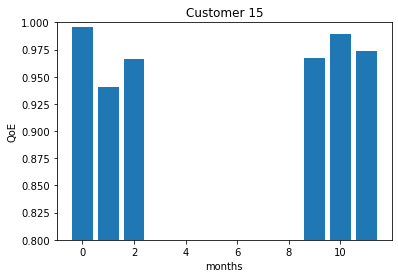

customer  16
[0.9850311803358552, 0.9933768869881293, 0.9755783086738163, 0.9823262132893723]
Number 16


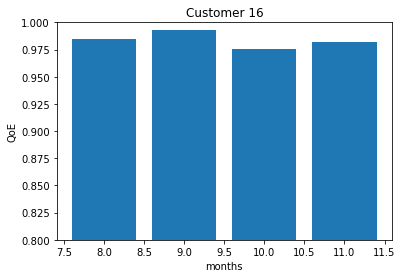

customer  17
[0.9666715887128069, 0.9899532554796133, 0.9916733903342048, 0.9716706889536451, 0.9783016319340606, 0.9818805779267015]
Number 17


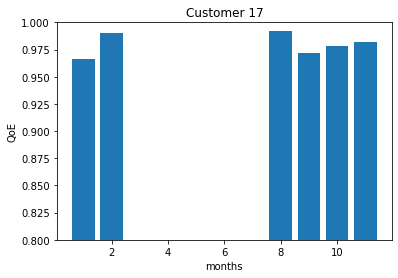

customer  18
[0.9949654440426664, 0.9826584741262229, 0.995546786815242, 0.9846195803030957, 0.9684052525110202, 0.9978020982869534]
Number 18


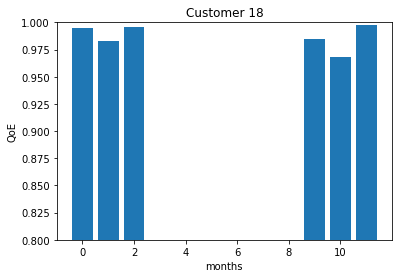

customer  19
[0.998422139868525, 0.9968505235493347, 0.9744402883698461, 0.9973720184006541, 0.9752743957989016, 0.9801773843218538]
Number 19


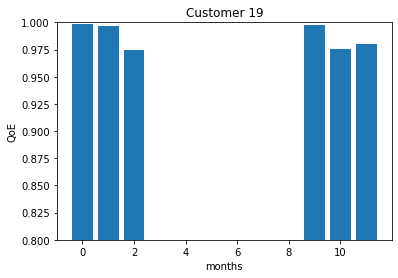

customer  20
[0.9844291717653211, 0.9945300439100472, 0.9948143239289295, 0.9935541004696973, 0.9976118626874158]
Number 20


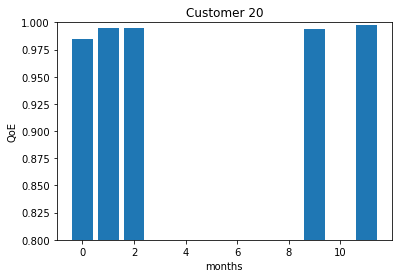

In [22]:
for customer in range(0,21):
    df_customer = df[df['customer_id'] == customer]
    
    QoE = [[] for _ in range(12)]
    #months = []
    events = df_customer.groupby('event_id')
    print("customer ", customer)
    for i in events.groups.keys():
        event = df_customer[df_customer['event_id'] == i]   

        datem = datetime.strptime(event['date'].min(), "%Y-%m-%d %H:%M:%S")

        argument = datem.month

        T = round((event['timestamp'].max() - event['timestamp'].min())*1.67*10**(-5) + 0.5)
       
        if (T==0):
            months.pop()
            continue;
        
        minutes = []
        minutes = (event['timestamp'] - event['timestamp'].min())*1.67*10**(-5)
        event['minute'] = minutes + 1 #vazw +1 wste to proto lepto na einai to 1 kai oxi to 0. 
                                        #Den exei ousiastikh diafora sto apotelesma
        event = event.astype({'minute':'int'})
        
        QoE[argument-1].append((sum(event.groupby('minute')['qoe'].mean()))/T)
        
        df.loc[df['event_id'] == i, 'QoE'] = ((sum(event.groupby('minute')['qoe'].mean()))/T)
        
        
    average_QoE = []
    months = []
    for i in range(12):
        if(len(QoE[i])):
            months.append(i)
            average_QoE.append(sum(QoE[i])/len(QoE[i]))
    
    print(average_QoE)
    print("Number", customer)
    plt.title(f"Customer %d" % customer)
    plt.xlabel('months')
    plt.ylabel('QoE')
    
    plt.bar(months, average_QoE)
    plt.ylim(0.8,1)
    plt.savefig(f"figures/average_qoe%d.jpg" % customer)
    plt.show()

In [23]:
df

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,date,QoE
0,1632762065906,5.0,107.0,11661.0,2.0,3.0,WFO,0.999976,0.0,785,2021-09-27 17:01:05,0.995236
1,1632762104254,5.0,107.0,12810.0,2.0,3.0,WFH,0.281964,0.9,3895,2021-09-27 17:01:44,0.995236
2,1632762108299,5.0,107.0,15129.0,19.0,3.0,WFH,1.000000,0.9,0,2021-09-27 17:01:48,0.995236
3,1632762112510,5.0,107.0,5860.0,217.0,3.0,WFH,0.999988,0.0,466,2021-09-27 17:01:52,0.995236
4,1632762129231,5.0,107.0,4483.0,2.0,3.0,WFO,1.000000,0.0,0,2021-09-27 17:02:09,0.995236
...,...,...,...,...,...,...,...,...,...,...,...,...
20615365,1647872264309,1.0,401.0,845.0,19.0,3.0,WFO,1.000000,0.0,0,2022-03-21 14:17:44,0.981789
20615366,1647872276879,1.0,401.0,11100.0,3963.0,3.0,WFO,1.000000,0.0,0,2022-03-21 14:17:56,0.981789
20615367,1647872288293,1.0,401.0,2155.0,6.0,1.0,WFO,1.000000,0.0,0,2022-03-21 14:18:08,0.981789
20615368,1647872288564,1.0,401.0,1011.0,19.0,3.0,WFO,1.000000,0.9,0,2022-03-21 14:18:08,0.981789


# Bullet 2

#  Discretize buffer

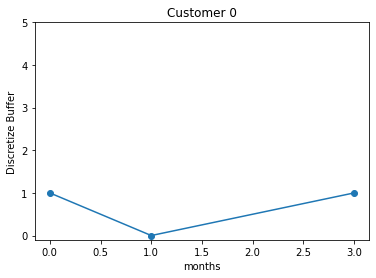

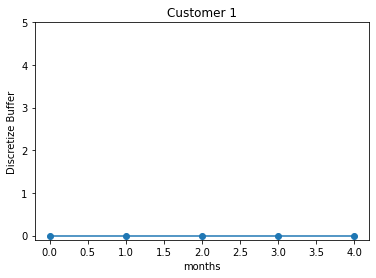

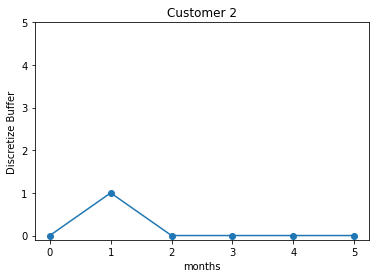

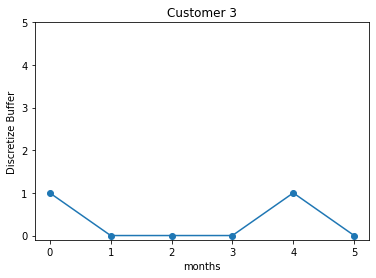

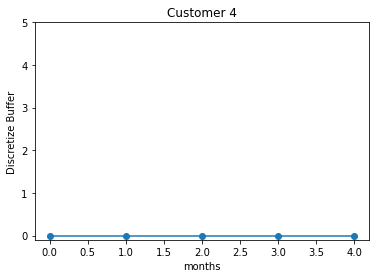

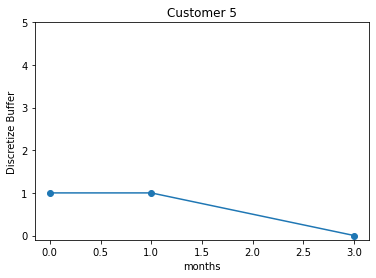

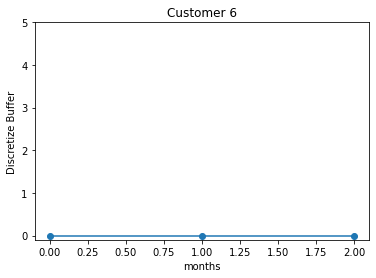

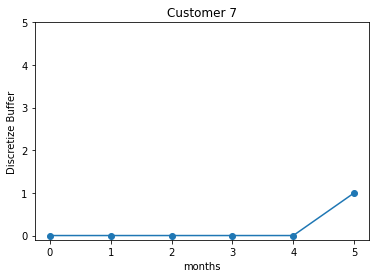

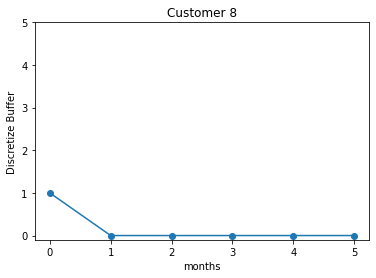

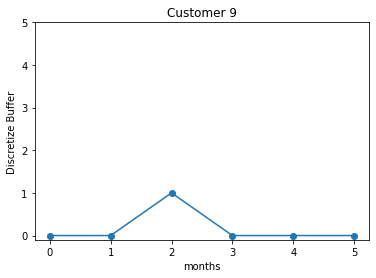

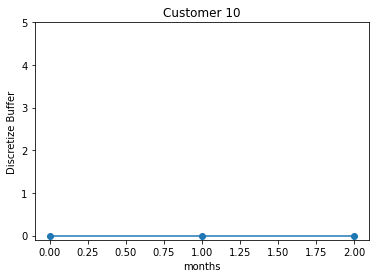

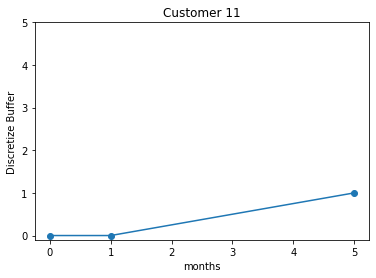

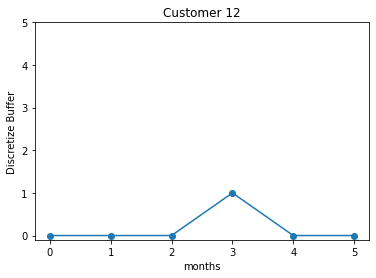

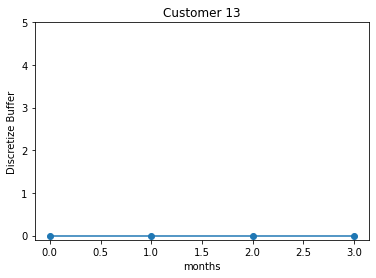

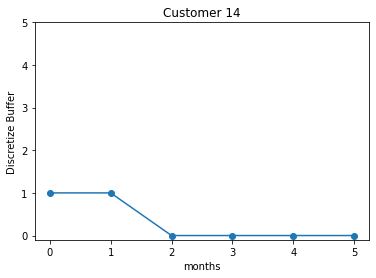

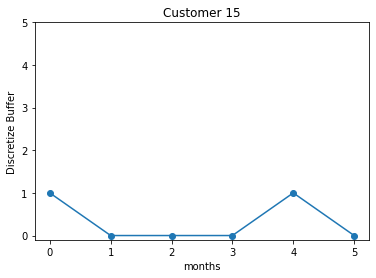

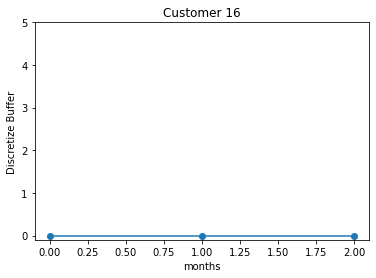

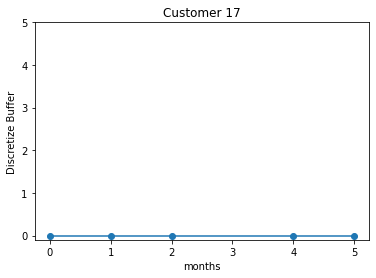

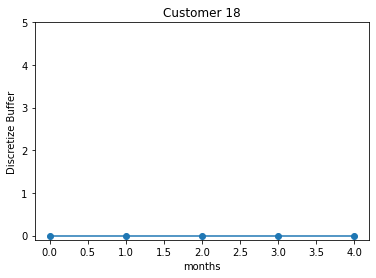

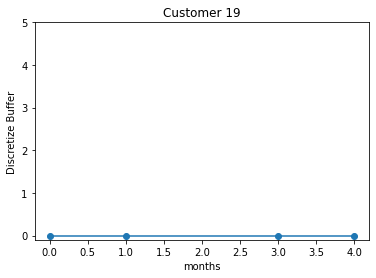

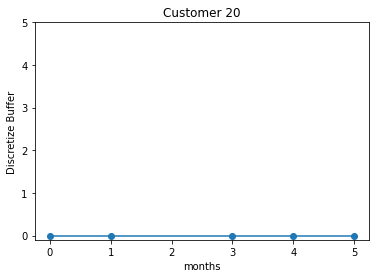

In [24]:
from sklearn.preprocessing import KBinsDiscretizer
from math import ceil

est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
# process of discretization on the total dataset
buffer_np_array = df['buffer_ms']

x = buffer_np_array.to_numpy()

x_reshape = x.reshape((len(x),1))
est.fit(x_reshape)
y = est.transform(x_reshape)
discretize_buffer = y.flatten()
df['discretize_buffer'] = discretize_buffer

for i in range(0,21):
    
    severity = []
    df_customer = df[df['customer_id'] == i]
    months = (df_customer['timestamp'] - df_customer['timestamp'].min())*3.8*10**(-10)
    df_customer['month'] = months
    df_customer['month'] = df_customer['month'].astype(int)
    mons = df_customer.groupby('month')
    m = []
    
    for j in mons.groups.keys():
        mont = df_customer[df_customer['month'] == j]
        m.append(mont['month'].min())
        avg_bf = mont['discretize_buffer'].mean()
        severity.append(ceil(avg_bf))
        #severity.append(avg_bf)

    plt.scatter(m,severity)
    plt.plot(m,severity)
    plt.ylim(-0.1,5)
    
    plt.title(f"Customer %d" % i)
    plt.xlabel('months')
    plt.ylabel('Discretize Buffer')
    plt.savefig(f"figures/bullet2/discretize_buffer%d.jpg" % i)
    plt.show()

# Bullet 3

# Discetize QoE

In [25]:
from sklearn.preprocessing import KBinsDiscretizer

In [26]:
from math import ceil
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
# process of discretization on the total dataset
QoE_np_array = df['QoE']

x = QoE_np_array.to_numpy()

x_reshape = x.reshape((len(x),1))
est.fit(x_reshape)
y = est.transform(x_reshape)
discretize_QoE = y.flatten()
df['discretize_QoE'] = discretize_QoE

In [27]:
months = (df['timestamp'] - df['timestamp'].min())*3.8*10**(-10)
df['month'] = months
df['month'] = df['month'].astype(int)

In [28]:
df

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,date,QoE,discretize_buffer,discretize_QoE,month
0,1632762065906,5.0,107.0,11661.0,2.0,3.0,WFO,0.999976,0.0,785,2021-09-27 17:01:05,0.995236,0.0,4.0,0
1,1632762104254,5.0,107.0,12810.0,2.0,3.0,WFH,0.281964,0.9,3895,2021-09-27 17:01:44,0.995236,0.0,4.0,0
2,1632762108299,5.0,107.0,15129.0,19.0,3.0,WFH,1.000000,0.9,0,2021-09-27 17:01:48,0.995236,0.0,4.0,0
3,1632762112510,5.0,107.0,5860.0,217.0,3.0,WFH,0.999988,0.0,466,2021-09-27 17:01:52,0.995236,0.0,4.0,0
4,1632762129231,5.0,107.0,4483.0,2.0,3.0,WFO,1.000000,0.0,0,2021-09-27 17:02:09,0.995236,0.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20615365,1647872264309,1.0,401.0,845.0,19.0,3.0,WFO,1.000000,0.0,0,2022-03-21 14:17:44,0.981789,0.0,4.0,5
20615366,1647872276879,1.0,401.0,11100.0,3963.0,3.0,WFO,1.000000,0.0,0,2022-03-21 14:17:56,0.981789,0.0,4.0,5
20615367,1647872288293,1.0,401.0,2155.0,6.0,1.0,WFO,1.000000,0.0,0,2022-03-21 14:18:08,0.981789,0.0,4.0,5
20615368,1647872288564,1.0,401.0,1011.0,19.0,3.0,WFO,1.000000,0.9,0,2022-03-21 14:18:08,0.981789,0.0,4.0,5


In [29]:
months = df.groupby(['month'])

QoE LEVEL 0


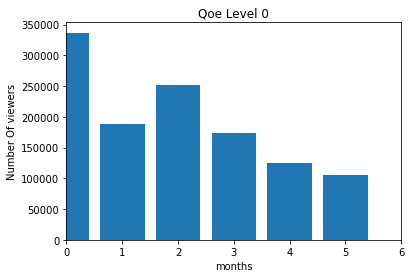

QoE LEVEL 1


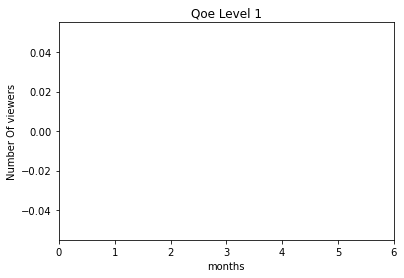

QoE LEVEL 2


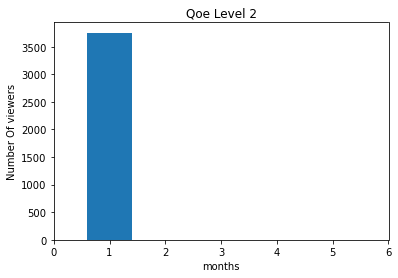

QoE LEVEL 3


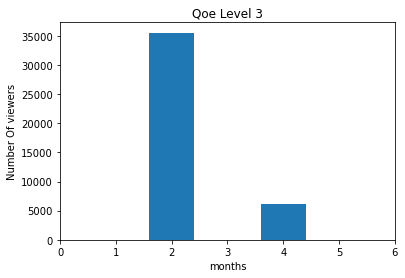

QoE LEVEL 4


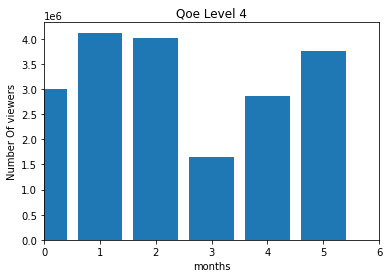

In [30]:
for qoe_level in range(0,5):
    viewers_per_month = []
    df_QoE = df[df['discretize_QoE'] == qoe_level]
    months = df_QoE.groupby(['month'])
    viewers_each_month = df_QoE.groupby(['month']).count()
    for month in range(0,viewers_each_month.shape[0]):
        viewers_per_month.append(viewers_each_month.iloc[month][0])
        
    print("QoE LEVEL", qoe_level)
    plt.bar(months.groups.keys(), viewers_per_month)
    plt.xlim(0,6)
    plt.title(f"Qoe Level %d" % qoe_level)
    plt.xlabel('months')
    plt.ylabel('Number Of viewers')
    plt.savefig(f"figures/bullet3/qoe_level%d.jpg" % qoe_level)
    plt.show()

# Bullet 4

In [ ]:
# months = (df['timestamp'] - df['timestamp'].min())*3.8*10**(-10)
# df['month'] = months
# df['month'] = df['month'].astype(int)

In [31]:
df_wfo = df[df['viewer_type'] == 'WFO']

In [32]:
df_wfh = df[df['viewer_type'] == 'WFH']

In [33]:
for customer in range(0,21):
    df_customer = df_wfo[df_wfo['customer_id'] == customer]
    
    QoE = [[] for _ in range(12)]
    events = df_customer.groupby('event_id')
    print("customer ", customer)
    for i in events.groups.keys():
        event = df_customer[df_customer['event_id'] == i]   

        datem = datetime.strptime(event['date'].min(), "%Y-%m-%d %H:%M:%S")

        argument = datem.month
        T = round((event['timestamp'].max() - event['timestamp'].min())*1.67*10**(-5) + 0.5)
        if (T==0):
            months.pop()
            continue;
        
        minutes = []
        minutes = (event['timestamp'] - event['timestamp'].min())*1.67*10**(-5)
        event['minute'] = minutes + 1 #vazw +1 wste to proto lepto na einai to 1 kai oxi to 0. 
                                        #Den exei ousiastikh diafora sto apotelesma
        event = event.astype({'minute':'int'})
        
        QoE[argument-1].append((sum(event.groupby('minute')['qoe'].mean()))/T)

        df.loc[df['event_id'] == i, 'QoE'] = ((sum(event.groupby('minute')['qoe'].mean()))/T)
        
        
    average_QoE_wfo = []
    months_wfo = []
    for i in range(0,12):
        if(len(QoE[i])):
            months_wfo.append(i)
            average_QoE_wfo.append(sum(QoE[i])/len(QoE[i]))

customer  0
customer  1
customer  2
customer  3
customer  4
customer  5
customer  6
customer  7
customer  8
customer  9
customer  10
customer  11
customer  12
customer  13
customer  14
customer  15
customer  16
customer  17
customer  18
customer  19
customer  20


Number 0


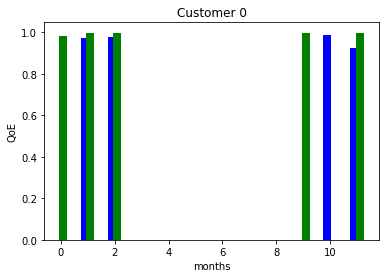

Number 1


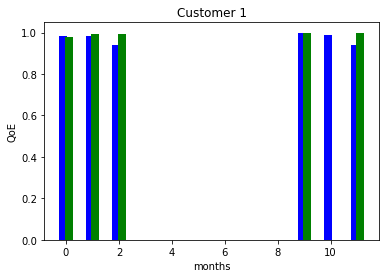

Number 2


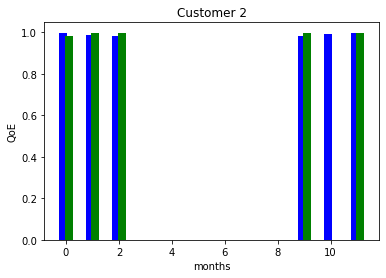

Number 3


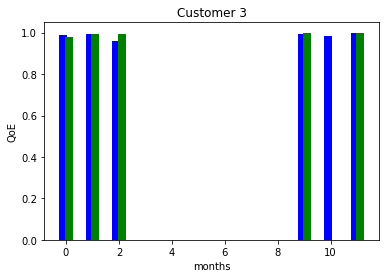

Number 4


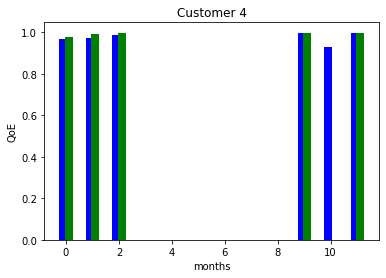

Number 5


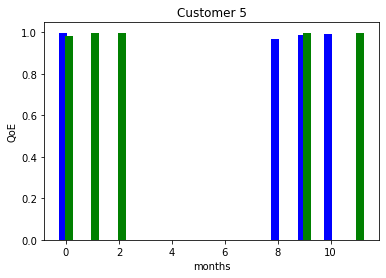

Number 6


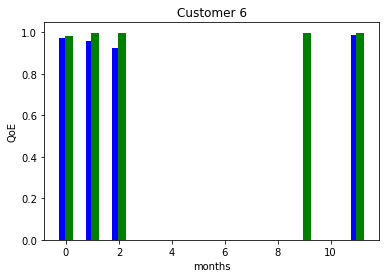

Number 7


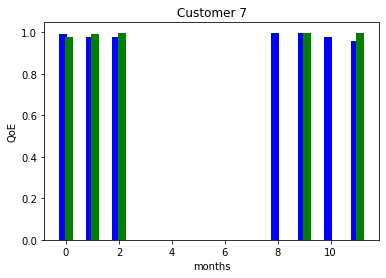

Number 8


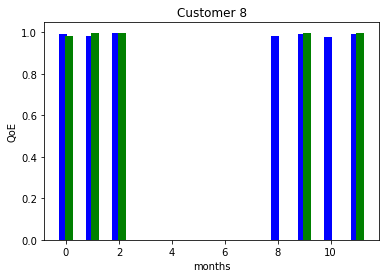

Number 9


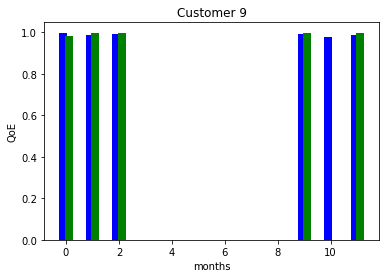

Number 10


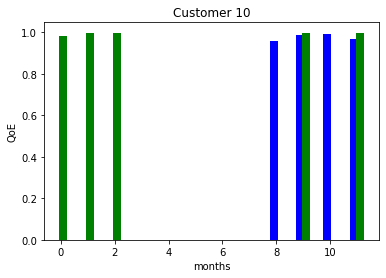

Number 11


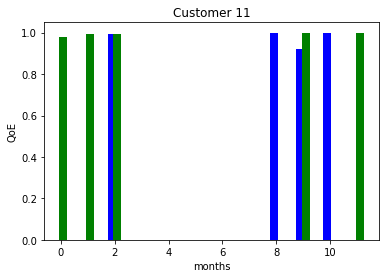

Number 12


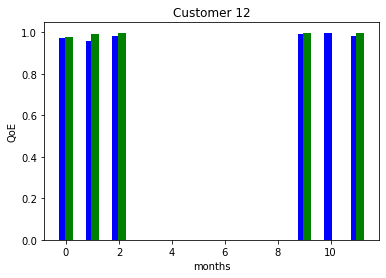

Number 13


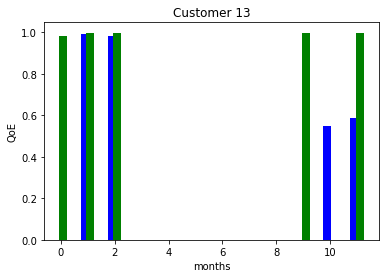

Number 14


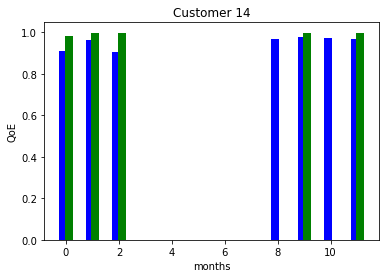

Number 15


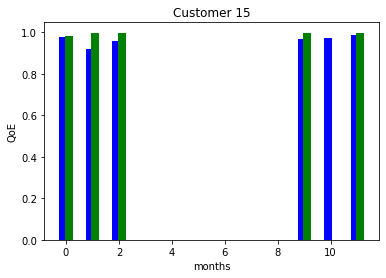

Number 16


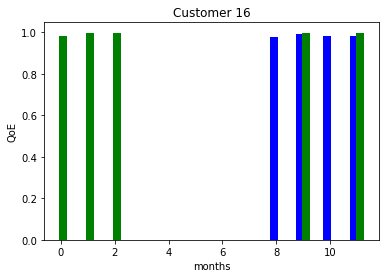

Number 17


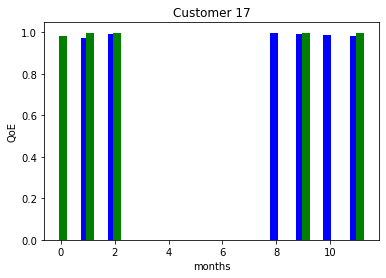

Number 18


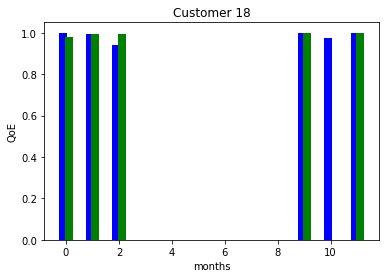

Number 19


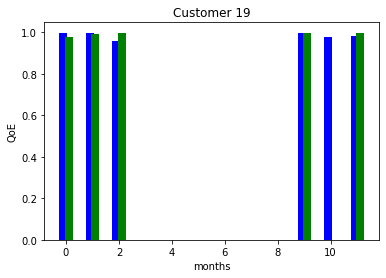

Number 20


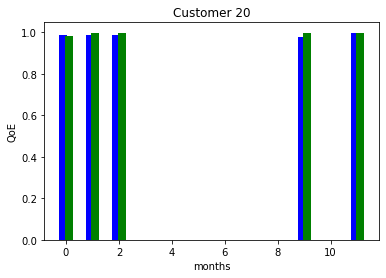

In [34]:
for customer in range(0,21):
    df_customer = df_wfh[df_wfh['customer_id'] == customer]
    
    QoE = [[] for _ in range(12)]
    events = df_customer.groupby('event_id')
    for i in events.groups.keys():
        event = df_customer[df_customer['event_id'] == i]   

        datem = datetime.strptime(event['date'].min(), "%Y-%m-%d %H:%M:%S")

        argument = datem.month
        T = round((event['timestamp'].max() - event['timestamp'].min())*1.67*10**(-5) + 0.5)
        if (T==0):
            continue;
        
        minutes = []
        minutes = (event['timestamp'] - event['timestamp'].min())*1.67*10**(-5)
        event['minute'] = minutes + 1 #vazw +1 wste to proto lepto na einai to 1 kai oxi to 0. 
                                        #Den exei ousiastikh diafora sto apotelesma
        event = event.astype({'minute':'int'})
        
        QoE[argument-1].append((sum(event.groupby('minute')['qoe'].mean()))/T)
        
        df.loc[df['event_id'] == i, 'QoE'] = ((sum(event.groupby('minute')['qoe'].mean()))/T)
        
        
    average_QoE_wfh = []
    months_wfh = []
    for i in range(12):
        if(len(QoE[i])):
            months_wfh.append(i)
            average_QoE_wfh.append(sum(QoE[i])/len(QoE[i]))
    
    print("Number", customer)
    plt.figure()
    ax = plt.subplot(111)
    w=0.3
    wfh = np.array(months_wfh)
    wfo = np.array(months_wfo)
    ax.bar(wfh-0.1,average_QoE_wfh,  width=w, color='b', align='center')
    ax.bar(wfo+0.1,average_QoE_wfo, width=w, color='g', align='center')
    plt.title(f"Customer %d" % customer)
    plt.xlabel('months')
    plt.ylabel('QoE')
    #plt.savefig(f"figures/bullet4/qoe_customer%d.jpg" % customer)
    plt.show()
    plt.show()
    

# bullet 5